In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from api_keys_file import g_key
import scipy.stats as st

# Sections

## Price and Rating Buckets by Grape and Country

## Best Quality:Price Ratio (Regression Analysis)

## What is a reasonable amount to spend on wine?

In [2]:
file = '../winedf_loc_cz2.csv'
df = pd.read_csv(file)
df_above = df.loc[df.price > 25,:]

In [3]:
df_above.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,Lat,Lng,heat weights,year,Climate Zone,Climate Zone Desc.
3,3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,42.343889,-71.101111,7,2012.0,Cfb,"Marine west coast, warm summer"


In [4]:
top_five = ["Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Red Blend", "Bordeaux-style Red Blend"]
var = df_above
#var = var.count().sort_values(by='price',ascending=False).head(5)
#var.mean().sort_values(by='price',ascending=False)
var = var.loc[(var["variety"] == top_five[0]) | (var["variety"] == top_five[1]) | (var["variety"] == top_five[2]) | (var["variety"] == top_five[3]) |(var["variety"] == top_five[4])]
var = var.groupby('variety')
var = var.median().sort_values(by='price',ascending=False)
var

,Unnamed: 0,points,price,Lat,Lng,heat weights,year
variety,,,,,,,
Cabernet Sauvignon,6721,90,53.0,38.500366,-119.979742,10,2010.0
Bordeaux-style Red Blend,6481,90,49.0,44.733282,-77.201624,10,2011.0
Pinot Noir,6641,91,48.0,38.559106,-120.199408,11,2012.0
Red Blend,6649,90,42.0,40.949544,-73.958905,10,2010.0
Chardonnay,6569,90,40.0,38.533504,-96.828782,10,2012.0


In [5]:
len(var)

5

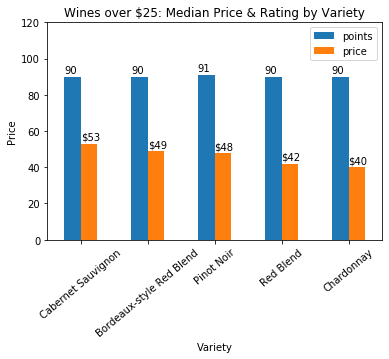

In [6]:
var = var.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year'])
var.plot(kind="bar", rot=40)
plt.ylabel("Price")
plt.title("Wines over $25: Median Price & Rating by Variety")

for x in range(len(var)):
    
    plt.annotate(xy=(x-0.25,var["points"][x]+2),
                s=var["points"][x])
    
    plt.annotate(xy=(x,var["price"][x]+2),
                s=var["price"].map('${:,.0f}'.format)[x])
plt.xlabel("Variety")
plt.ylim(0, 120)
plt.savefig('wine_over_25_variety.png')

In [7]:
country = df_above
top_five = ["US", "France", "Italy", "Spain", "Portugal"]
#var = var.count().sort_values(by='price',ascending=False).head(5)
#var.mean().sort_values(by='price',ascending=False)
country = country.loc[(country["country"] == top_five[0]) | (country["country"] == top_five[1]) | (country["country"] == top_five[2]) | (country["country"] == top_five[3]) |(country["country"] == top_five[4])]
country = country.groupby('country')
country = country.median().sort_values(by='price',ascending=False)
country

,Unnamed: 0,points,price,Lat,Lng,heat weights,year
country,,,,,,,
Italy,6472.0,90.0,49.0,43.213021,10.583095,10.0,2010.0
France,6559.5,91.0,46.0,46.280700,3.795447,11.0,2012.0
Portugal,6480.0,91.0,42.0,39.483117,-8.610846,11.0,2011.0
Spain,6559.0,90.0,42.0,41.528159,-3.743058,10.0,2009.0
US,6670.0,90.0,41.0,38.500011,-120.615235,10.0,2012.0


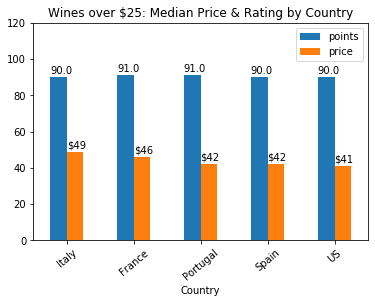

In [8]:
country = country.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year'])
country.plot(kind="bar", rot=40)
plt.title("Wines over $25: Median Price & Rating by Country")

for x in range(len(country)):
    
    plt.annotate(xy=(x-0.25,country["points"][x]+2),
                s=country["points"][x])
    
    plt.annotate(xy=(x,country["price"][x]+2),
                s=country["price"].map('${:,.0f}'.format)[x])
plt.xlabel("Country")
plt.ylim(0, 120)    
plt.savefig('wine_over_25_country.png')

In [9]:
df_below = df.loc[df.price < 25,:]

In [10]:
top_five = ["Pinot Noir", "Chardonnay", "Cabernet Sauvignon", "Red Blend", "Bordeaux-style Red Blend"]
var2 = df_below
#var = var.count().sort_values(by='price',ascending=False).head(5)
#var.mean().sort_values(by='price',ascending=False)
var2 = var2.loc[(var2["variety"] == top_five[0]) | (var2["variety"] == top_five[1]) | (var2["variety"] == top_five[2]) | (var2["variety"] == top_five[3]) |(var2["variety"] == top_five[4])]
var2 = var2.groupby('variety')
var2 = var2.median().sort_values(by='price',ascending=False)
var2 = var2.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year'])

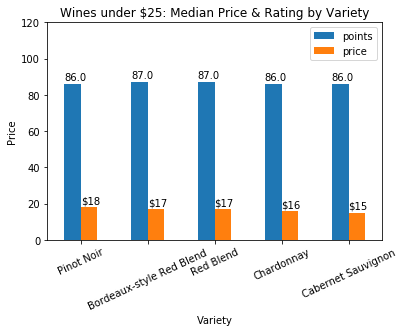

In [11]:
var2.plot(kind="bar", rot=25)
plt.ylabel("Price")
plt.title("Wines under $25: Median Price & Rating by Variety")

for x in range(len(var2)):
    
    plt.annotate(xy=(x-0.25,var2["points"][x]+2),
                s=var2["points"][x])
    
    plt.annotate(xy=(x,var2["price"][x]+2),
                s=var2["price"].map('${:,.0f}'.format)[x])
plt.xlabel("Variety")
plt.ylim(0, 120)   
plt.savefig('wine_under_25_variety.png')

In [12]:
country2 = df_below
top_five = ["US", "France", "Italy", "Spain", "Portugal"]
#var = var.count().sort_values(by='price',ascending=False).head(5)
#var.mean().sort_values(by='price',ascending=False)
country2 = country2.loc[(country2["country"] == top_five[0]) | (country2["country"] == top_five[1]) | (country2["country"] == top_five[2]) | (country2["country"] == top_five[3]) |(country2["country"] == top_five[4])]
country2 = country2.groupby('country')
country2  = country2.median().sort_values(by='price',ascending=False)
country2 = country2.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year'])


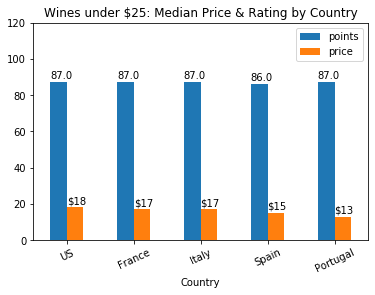

In [13]:
country2.plot(kind="bar", rot=25)
plt.title("Wines under $25: Median Price & Rating by Country")

for x in range(len(country2)):
    
    plt.annotate(xy=(x-0.25,country2["points"][x]+2),
                s=country2["points"][x])
    
    plt.annotate(xy=(x,country2["price"][x]+2),
                s=country2["price"].map('${:,.0f}'.format)[x])
plt.xlabel("Country")    
plt.ylim(0, 120)   
plt.savefig('wine_under_25_country.png')

In [14]:
df = df.drop(columns=['Unnamed: 0', 'Lat', 'Lng', 'heat weights', 'year', "description", "designation", "title", "taster_name", "taster_twitter_handle" ])

The Pearson 'R' Correlation is: 0.414400138470705


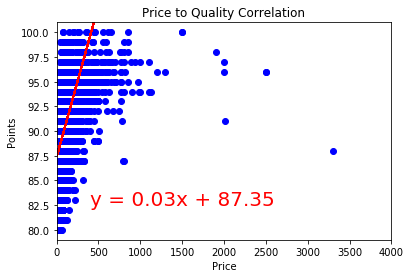

In [15]:
x_values = df["price"]
y_values = df["points"]


(slope, intercept, rvalue, pvvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(400, 82.5), fontsize=20, color="red")

plt.scatter(x_values, y_values, color='blue')

#labelling axis' and title
plt.xlabel("Price")
plt.ylabel("Points")
plt.title("Price to Quality Correlation")
plt.ylim(79, 101)
plt.xlim(0, 4000)
print("The Pearson 'R' Correlation is:",st.pearsonr(x_values, y_values)[0])
plt.savefig("quality_price_correlation.png")
plt.show()

The Pearson 'R' Correlation is: 0.414400138470705


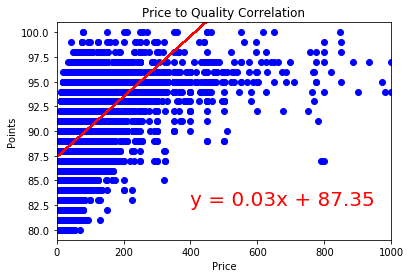

In [20]:
x_values = df["price"]
y_values = df["points"]


(slope, intercept, rvalue, pvvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(400, 82.5), fontsize=20, color="red")

plt.scatter(x_values, y_values, color='blue')

#labelling axis' and title
plt.xlabel("Price")
plt.ylabel("Points")
plt.title("Price to Quality Correlation")
plt.ylim(79, 101)
plt.xlim(0, 1000)
print("The Pearson 'R' Correlation is:",st.pearsonr(x_values, y_values)[0])
plt.savefig("quality_price_correlation2.png")
plt.show()

In [16]:
reasonable_price_df_vgood = df.loc[(df["points"]==85) | (df["points"]==86) | (df["points"]==87) | (df["points"]==88) | (df["points"]==89)]
reasonable_price_df_vgood["price"].median()

20.0

In [17]:
reasonable_price_df_excellent = df.loc[(df["points"]==90) | (df["points"]==91) | (df["points"]==92) | (df["points"]==93) | (df["points"]==94)]
reasonable_price_df_excellent["price"].median()

40.0

df["custom rating"] = (df["points"]-80)*5